# Problem Statement
In this challenge, we need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

In [1]:
# imporing neccessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# setting working directory
os.chdir("C:/Users/Radhika/Desktop")

In [55]:
# loading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Exploratory Data Analysis

In [4]:
train.shape, test.shape

((200000, 202), (200000, 201))

Both train and test data have 200,000 entries and 202, respectivelly 201 columns.

Let's glimpse train and test dataset.

In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


We can make few observations here:

a. standard deviation is relatively large for both train and test variable data;

b. min, max, mean, sdt values for train and test data looks quite close;

c. mean values are distributed over a large range.

The number of values in train and test set is the same.

In [7]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Train contains:

ID_code (string);
target;
200 numerical variables, named from var_0 to var_199;

Test contains:

ID_code (string);
200 numerical variables, named from var_0 to var_199;
Let's check if there are any missing data. We will also chech the type of data.

We check first train.

In [9]:
# after exploring the test and train sets, we found that ID_code column doesn't require here, it does nothing but the id, so drop
train=train.drop(['ID_code'],axis=1)

In [10]:
train.dtypes, test.dtypes

(target       int64
 var_0      float64
 var_1      float64
 var_2      float64
 var_3      float64
 var_4      float64
 var_5      float64
 var_6      float64
 var_7      float64
 var_8      float64
 var_9      float64
 var_10     float64
 var_11     float64
 var_12     float64
 var_13     float64
 var_14     float64
 var_15     float64
 var_16     float64
 var_17     float64
 var_18     float64
 var_19     float64
 var_20     float64
 var_21     float64
 var_22     float64
 var_23     float64
 var_24     float64
 var_25     float64
 var_26     float64
 var_27     float64
 var_28     float64
             ...   
 var_170    float64
 var_171    float64
 var_172    float64
 var_173    float64
 var_174    float64
 var_175    float64
 var_176    float64
 var_177    float64
 var_178    float64
 var_179    float64
 var_180    float64
 var_181    float64
 var_182    float64
 var_183    float64
 var_184    float64
 var_185    float64
 var_186    float64
 var_187    float64
 var_188    float64


Let's check the distribution of target value in train dataset.

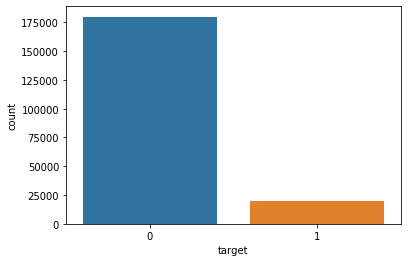

In [11]:
sns.countplot(train['target'])

The figure shows that there is a class imbalance, we can handle this problem while model building

In [79]:
features = ["var_{}".format(i) for i in range(200)]

In [75]:
def plot_feature_distplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        sns.distplot(df[feature])
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

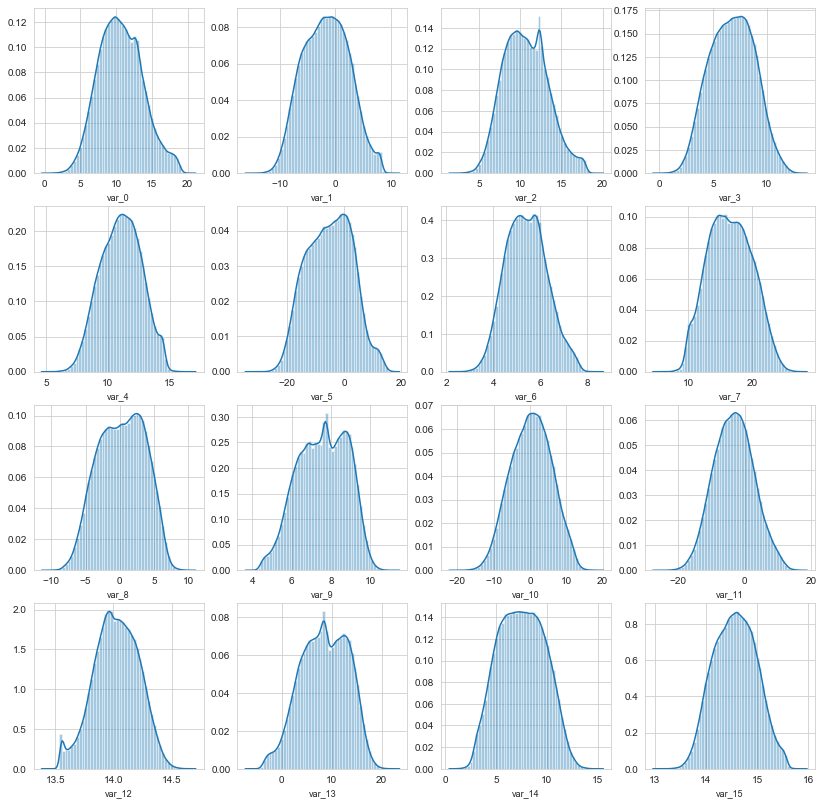

<Figure size 432x288 with 0 Axes>

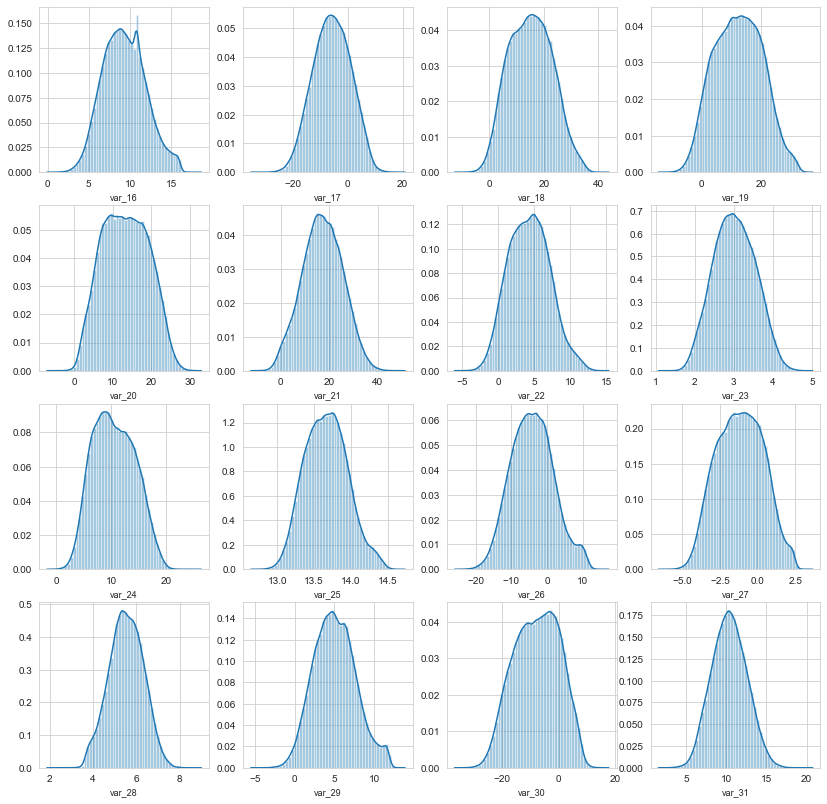

<Figure size 432x288 with 0 Axes>

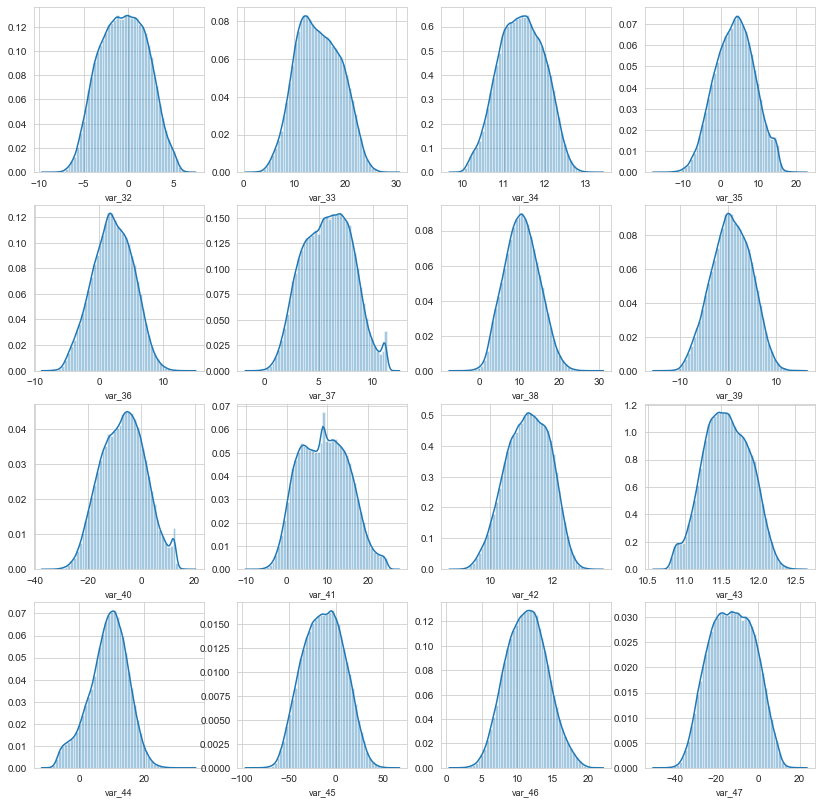

<Figure size 432x288 with 0 Axes>

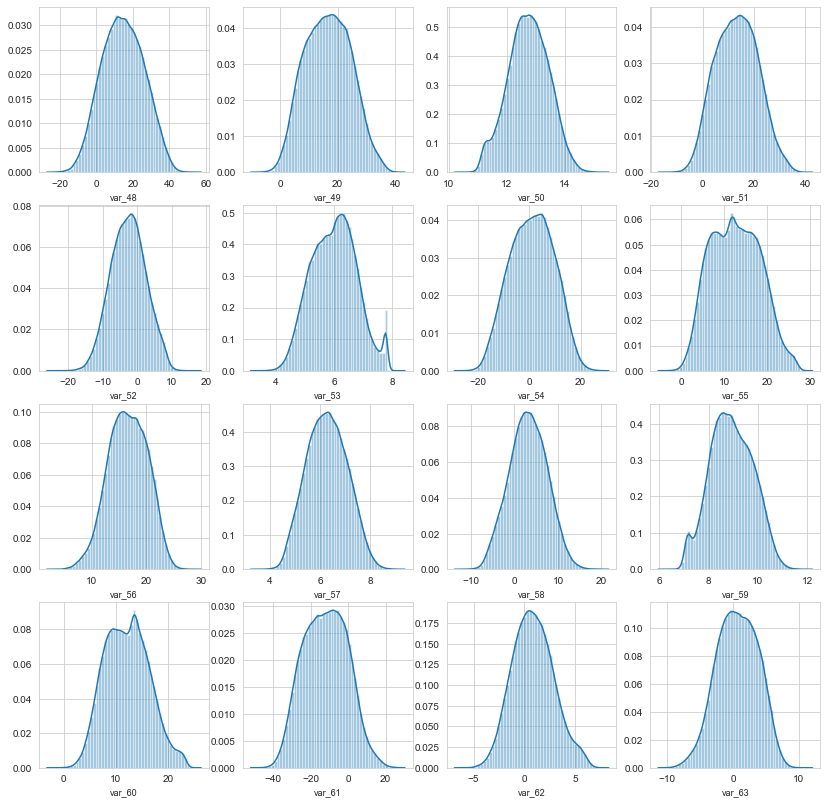

<Figure size 432x288 with 0 Axes>

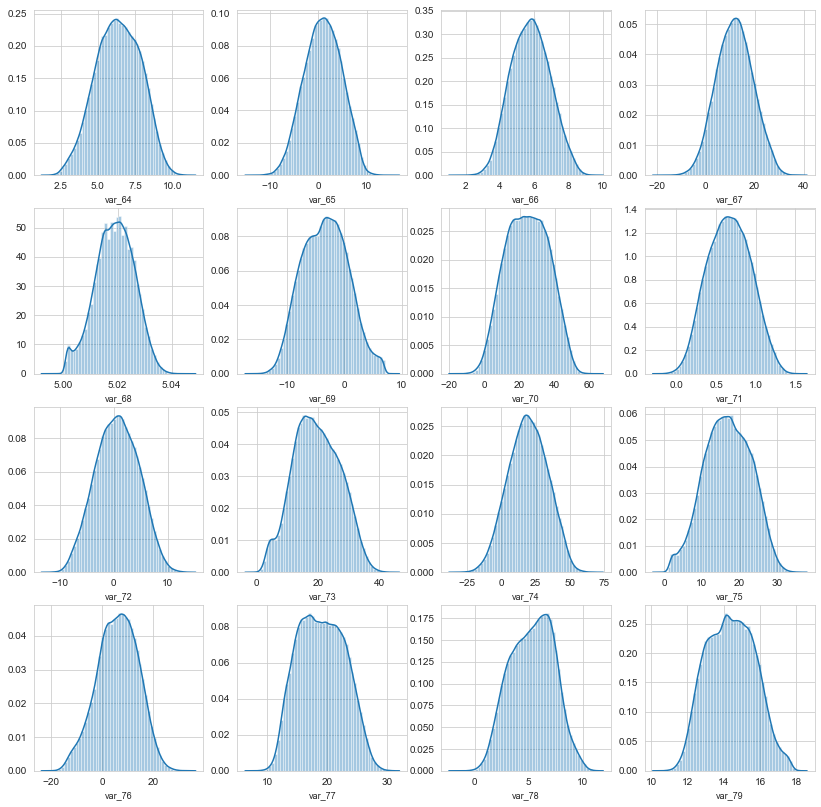

<Figure size 432x288 with 0 Axes>

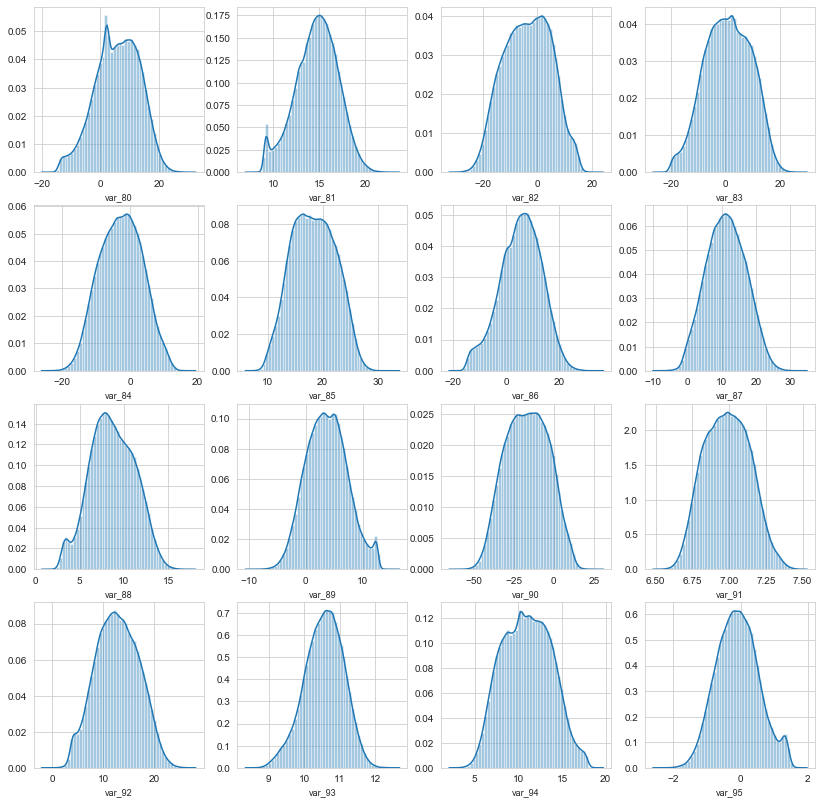

<Figure size 432x288 with 0 Axes>

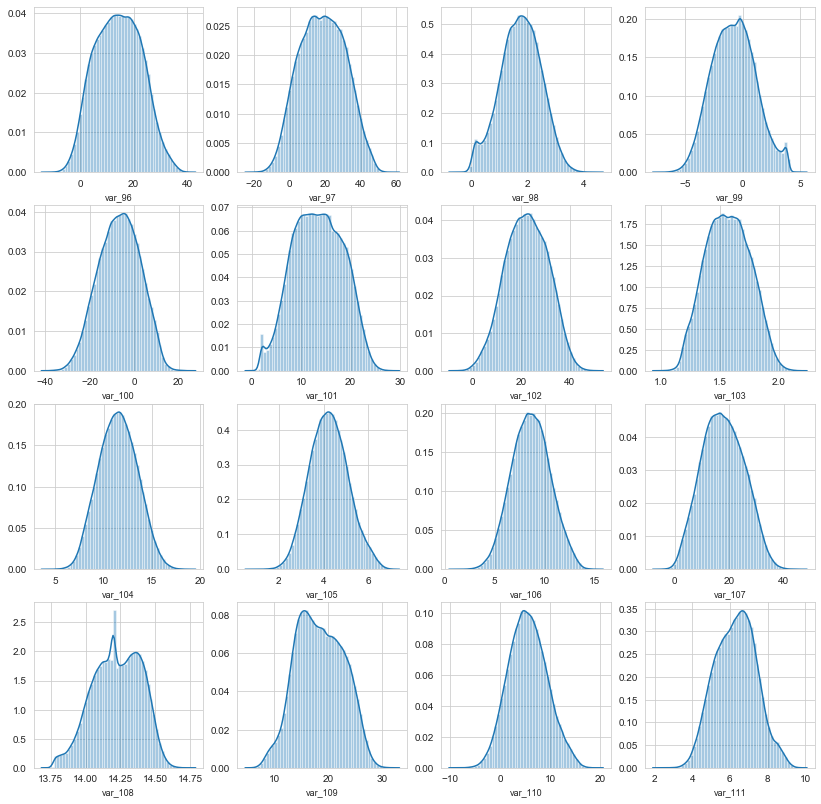

<Figure size 432x288 with 0 Axes>

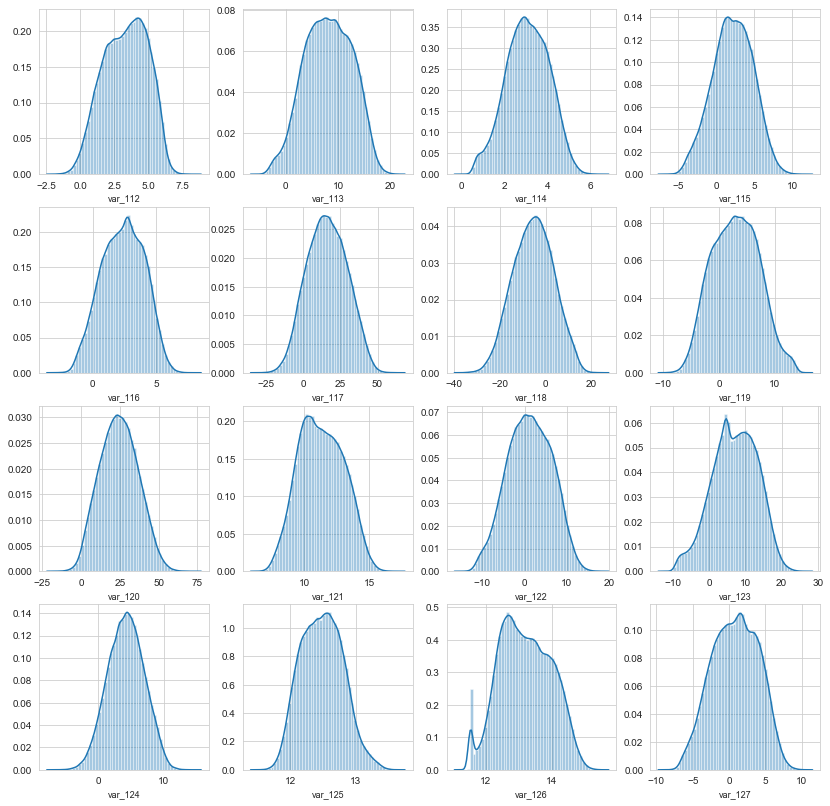

<Figure size 432x288 with 0 Axes>

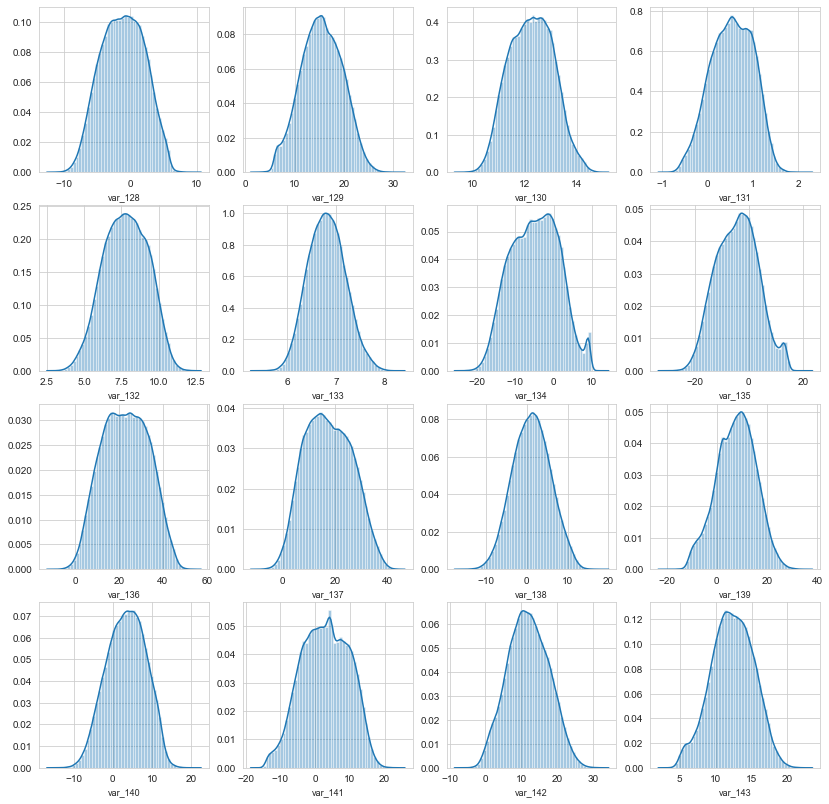

<Figure size 432x288 with 0 Axes>

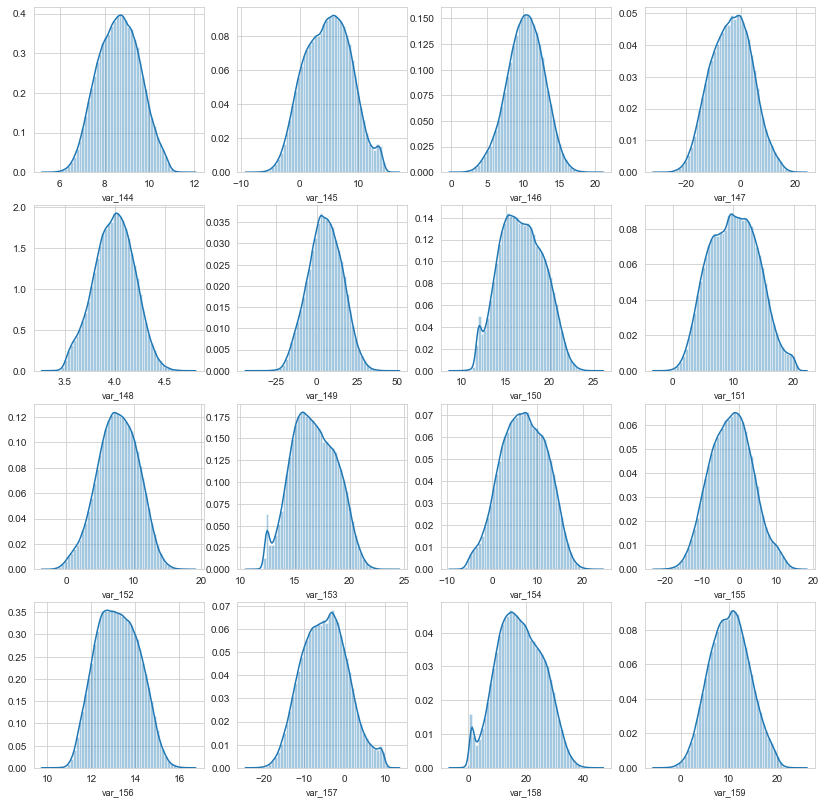

<Figure size 432x288 with 0 Axes>

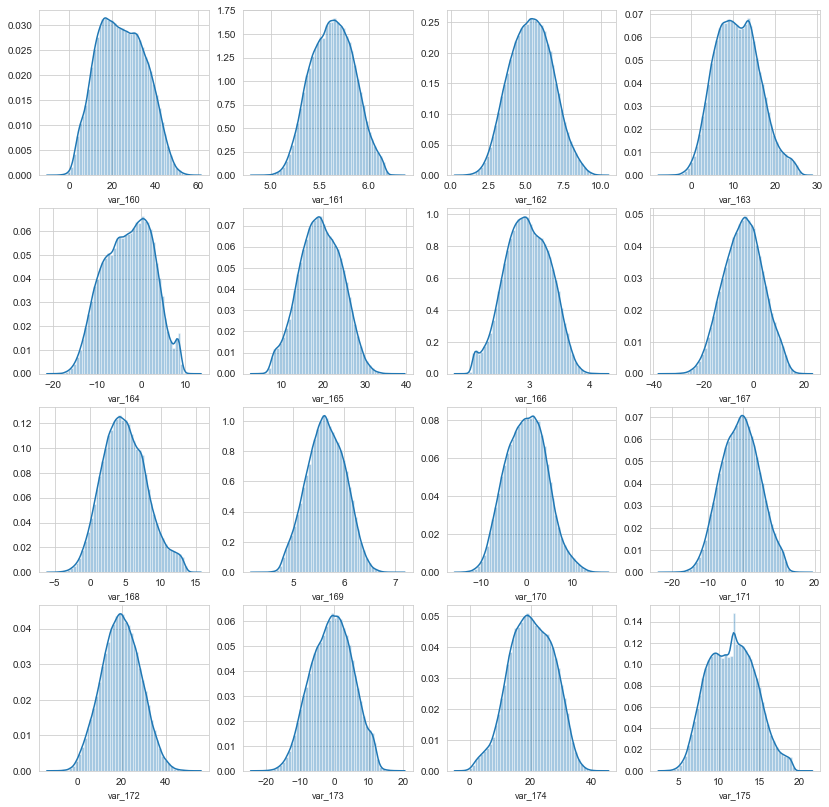

<Figure size 432x288 with 0 Axes>

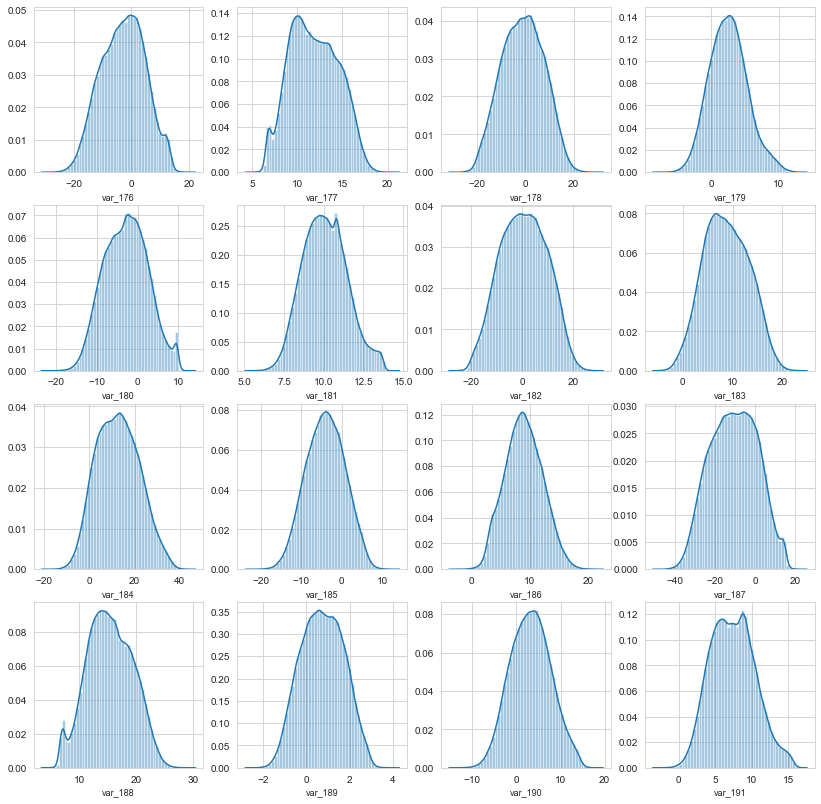

<Figure size 432x288 with 0 Axes>

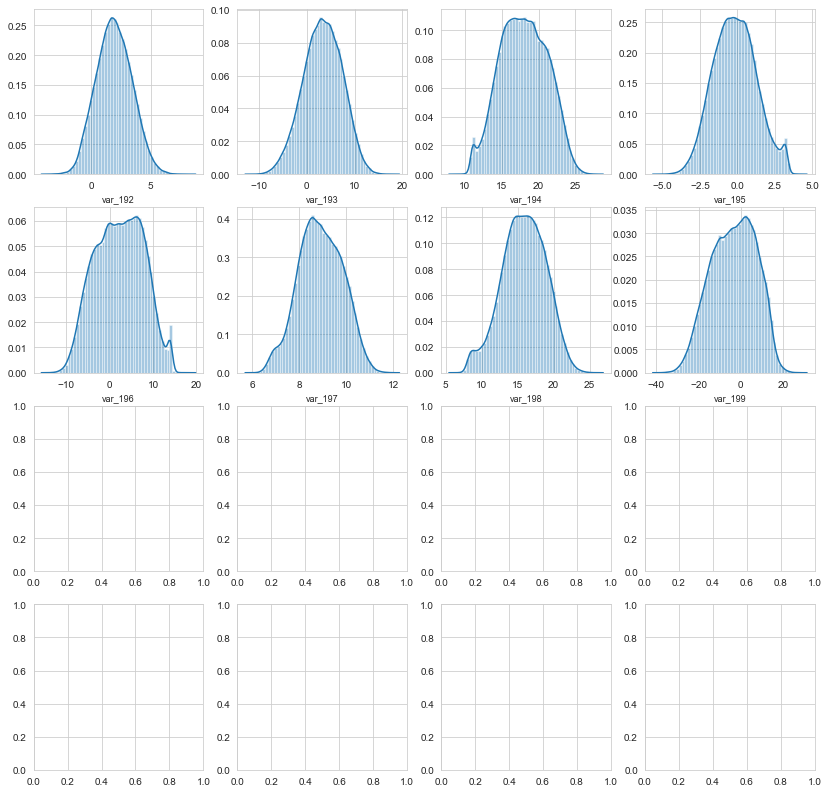

In [78]:
c = 0
for j in range(16, 200, 16):
    plot_feature_distplot(train, features[c:j])
    c += 16

plot_feature_distplot(train, features[c:])

# Data Wrangling
1. Missing Value Analysis
2. Outlier Analysis
3. Correlation Analysis

In [24]:
# checking for the duplicates
train.drop_duplicates().shape

(200000, 201)

# Missing Value Analysis

In [25]:
# Checking for missing data in train dataset. there are no missing values.
train.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

# Correlation Analysis

In [26]:
train.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.010915,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.030979,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.066731,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,-0.003025,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854


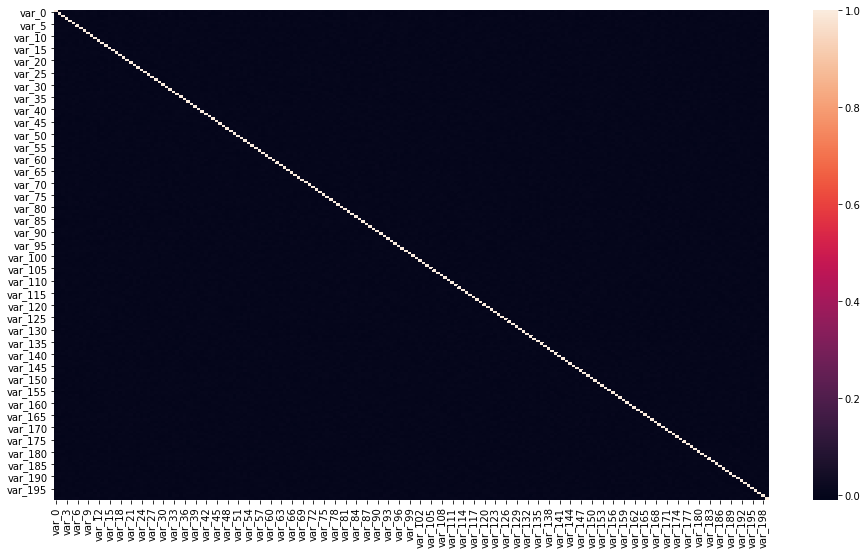

In [74]:
plt.figure(figsize=[16,9])
sns.heatmap(train[features].corr())

# Outlier Analysis

In [29]:
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

In [30]:
numerical_features=train.columns[2:]

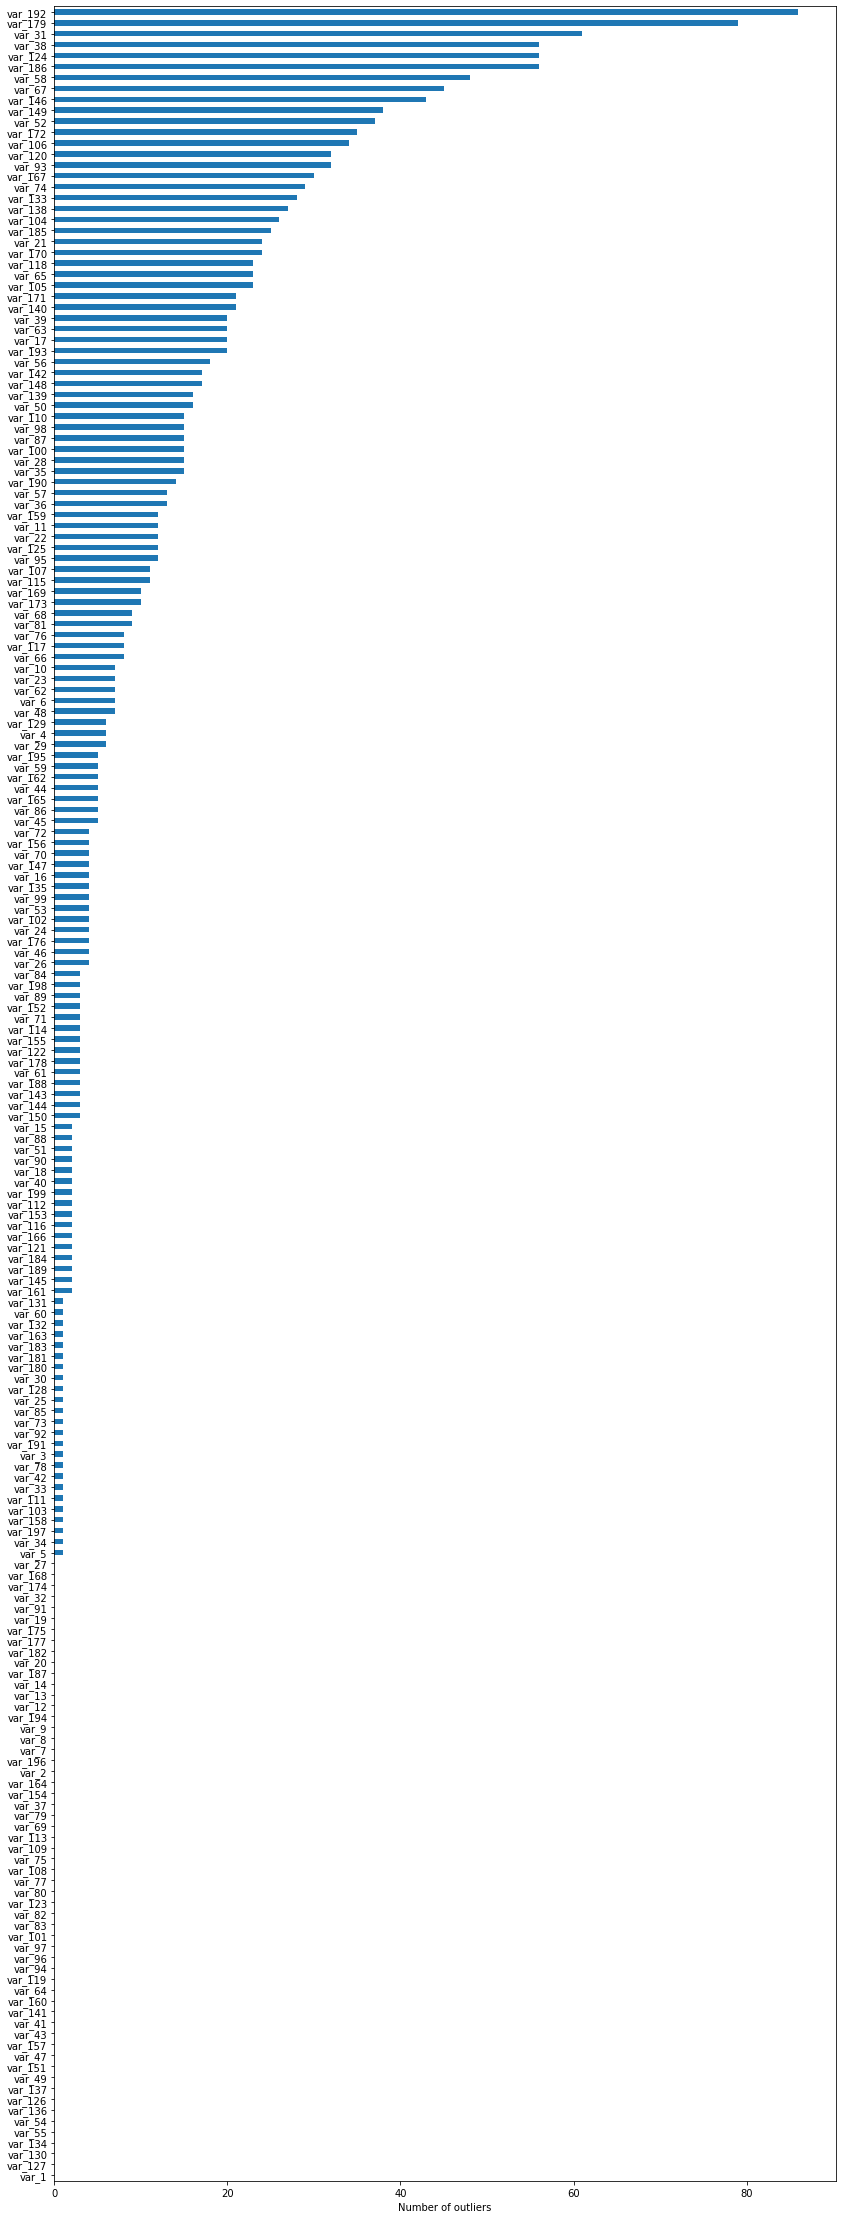

In [31]:
from scipy.special import erfc
train_outliers = dict()
for col in [col for col in numerical_features]:
    train_outliers[col] = train[chauvenet(train[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [32]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / train.shape[0]) * 100))

Total number of outliers in training set: 1738 (0.87%)


In [33]:
for col in numerical_features:
    train=train.loc[(~chauvenet(train[col].values))]
for col in numerical_features:
    test=test.loc[(~chauvenet(test[col].values))]

# Model Development

Dividing the data into train and test

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix
target = train['target']
train = train.drop(['target'], axis = 1)
x = train
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((158612, 200), (39654, 200), (158612,), (39654,))

Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Logistic Regression

In [36]:
# initiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
from sklearn import metrics
a=accuracy_score(y_test,y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy: %f"%a)

Confusion Matrix:
[[35708     0]
 [    0  3946]]
Accuracy: 1.000000


In [37]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.92442532 0.68952135]
recall: [0.98655763 0.27014698]
fscore: [0.95448141 0.38820102]


Decision Tree

In [38]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

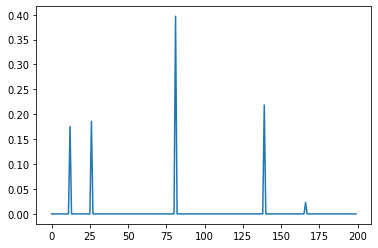

In [39]:
plt.plot(clf_gini.feature_importances_)

In [40]:
dt_pred = clf_gini.predict(x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score
print("Accuracy score %f" % accuracy_score(y_test,dt_pred))
c=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix:")
print(c)

Accuracy score 0.900590
Confusion Matrix:
[[35707     1]
 [ 3941     5]]


In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, dt_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.90060028 0.83333333]
recall: [0.999972   0.00126711]
fscore: [0.94768831 0.00253036]


In [43]:
dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
y_test.head()

144074    0
149927    0
36395     0
85730     0
83430     0
Name: target, dtype: int64

In [45]:
TP=c[0][0]
FP=c[0][1]
FN=c[1][0]
TN=c[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Negative: %d"%FN)
print("True Negative: %d"%TN)

True Positive: 35707
False Positive: 1
False Negative: 3941
True Negative: 5


Random Forest

In [46]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0,criterion="gini",max_depth=100)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [47]:
print("Accuracy score %f" % accuracy_score(y_test,rf_pred))
d=confusion_matrix(y_test,rf_pred)
print(d)

Accuracy score 0.900741
[[35701     7]
 [ 3929    17]]


In [48]:
TP=d[0][0]
FP=d[0][1]
FN=d[1][0]
TN=d[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Negative: %d"%FN)
print("True Negative: %d"%TN)

True Positive: 35701
False Positive: 7
False Negative: 3929
True Negative: 17


In [49]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, rf_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.90085794 0.70833333]
recall: [0.99980397 0.00430816]
fscore: [0.94775545 0.00856423]


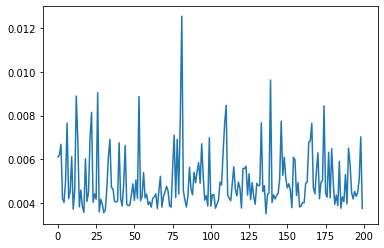

In [50]:
plt.plot(classifier.feature_importances_)

Since Random Forest model fits the data - predicting better classes compared to other models, finalizing it

Predicting on test data

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [57]:
test_data_std=pd.DataFrame(sc.transform(test.iloc[:,1:]))

In [58]:
(pd.DataFrame(classifier.predict(test_data_std))).shape

(200000, 1)

In [59]:
predictions=classifier.predict(test_data_std)

In [60]:
test_data_std['target']=predictions

In [62]:
test_data_std.to_csv('test_data_std.csv')

In [65]:
test_data_std.head(10)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,target
0,0.133982,2.327446,0.852790,1.286580,0.220422,0.339302,0.502075,0.507628,0.556964,1.007087,...,1.451559,-2.267588,-0.218044,-1.364614,1.818985,0.380899,1.962828,-0.131945,-0.526357,0
1,-0.700870,0.712423,0.226756,-0.780630,-1.162422,0.132014,0.699025,0.613951,-1.407056,-1.295199,...,0.455057,-0.665993,1.703425,-0.770691,0.427340,-0.693329,1.041340,1.083560,-1.705010,0
2,-1.704490,-2.161579,-0.215177,0.126508,-0.503324,1.887818,-0.601566,1.087629,0.373846,0.628960,...,1.168601,0.036728,-0.285819,-1.597018,1.582008,-1.725840,-2.009582,1.338254,-1.916905,0
3,-0.698565,0.074754,0.499091,-0.103918,-1.379935,1.045199,-0.549870,1.178826,0.929500,-0.090601,...,0.534953,-0.181048,0.064893,-0.894583,2.307698,0.305857,0.344306,-0.948042,-0.092749,0
4,0.344802,0.369148,1.299241,0.468835,-1.220512,-0.449119,1.670363,-1.730001,0.813551,-0.345580,...,0.566588,-0.434095,0.013961,0.495832,-0.106558,-1.368278,-1.763736,-0.645853,-0.571065,0
5,-1.538685,-0.165093,-0.797929,0.136544,1.961147,-0.460721,-1.351319,-0.515683,0.480555,-0.231525,...,-0.112545,-1.588449,1.390555,-0.972147,-1.455886,-1.526568,0.976512,0.413306,1.353104,0
6,-0.723263,-1.109332,-1.270806,0.718309,0.577809,-0.274071,-1.443492,-1.006941,-1.373247,-1.015785,...,-0.195747,1.467035,1.383121,-0.157919,0.114122,1.001298,0.258955,0.865626,0.807443,0
7,2.188147,-0.197242,1.021856,0.785098,0.000805,1.867448,0.629636,0.385039,-1.525165,-0.085324,...,-1.003863,-0.672750,-0.456157,-0.869938,-1.160714,0.778634,1.708186,2.523978,0.382230,0
8,-1.209579,0.609935,1.142287,-0.980804,-1.483495,-1.106855,-1.245038,-0.567925,0.693343,-0.282424,...,0.137886,0.367480,-0.840481,-0.408377,0.178892,-0.683708,1.094874,0.371361,-0.008084,0
9,-0.091427,-1.314332,1.504072,1.123333,0.513100,-0.730848,-2.271771,1.095776,-0.506495,-0.673214,...,1.194649,-0.699507,0.361895,-0.908879,0.518410,-1.236722,0.723608,-0.018142,1.210941,0
